In [24]:
import pandas as pd
import numpy as np
import opendatasets as od
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
# Assign the Kaggle data set URL into variable
dataset = 'https://www.kaggle.com/competitions/playground-series-s4e10/data'
# Using opendatasets let's download the data sets
od.download(dataset )

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

  rajabhi1


Your Kaggle Key:

  ································


100%|██████████████████████████████████████████████████████████████████████████████| 1.45M/1.45M [00:01<00:00, 889kB/s]


Extracting archive .\playground-series-s4e10/playground-series-s4e10.zip to .\playground-series-s4e10


In [2]:
df_train = pd.read_csv("playground-series-s4e10/train.csv",index_col=0)
df_test = pd.read_csv("playground-series-s4e10/test.csv", index_col=0)
df_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
id,,,,,,,,,,,,
0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58645 entries, 0 to 58644
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  58645 non-null  int64  
 1   person_income               58645 non-null  int64  
 2   person_home_ownership       58645 non-null  object 
 3   person_emp_length           58645 non-null  float64
 4   loan_intent                 58645 non-null  object 
 5   loan_grade                  58645 non-null  object 
 6   loan_amnt                   58645 non-null  int64  
 7   loan_int_rate               58645 non-null  float64
 8   loan_percent_income         58645 non-null  float64
 9   cb_person_default_on_file   58645 non-null  object 
 10  cb_person_cred_hist_length  58645 non-null  int64  
 11  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 5.8+ MB


In [14]:
# segregating cat and num cols
num_cols, cat_cols = [] , []
for i in df_train.columns:
    if i != 'loan_status':
        if df_train[i].dtypes in ['int64','float64'] :
            num_cols.append(i)
        else:
            cat_cols.append(i)
print(f'num cols: {num_cols}, \n cat_cols : {cat_cols}')        

num cols: ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'], 
 cat_cols : ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']


## Univariate analysis

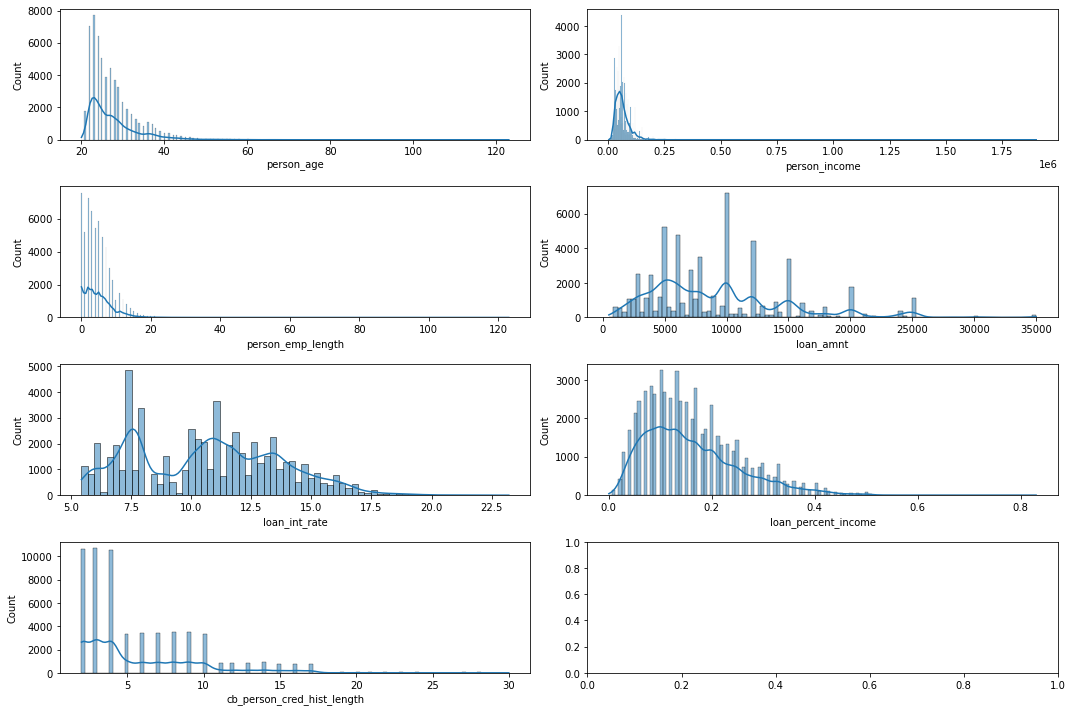

In [11]:
# Num cols
# create the figure and axes
a4_dims = (15, 10)
fig, axes = plt.subplots(4, 2, figsize=a4_dims)
axes = axes.ravel()  # flattening the array makes indexing easier

for col, ax in zip(num_cols, axes):
    sns.histplot(data=df_train[col], kde=True, stat='count', ax=ax)    

fig.tight_layout()
plt.show()

<AxesSubplot:ylabel='loan_status'>

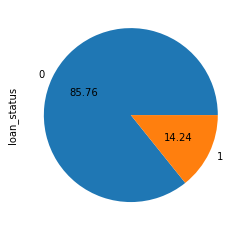

In [13]:
# we have imbalance data set 
df_train['loan_status'].value_counts().plot(kind='pie',autopct = '%.2f')

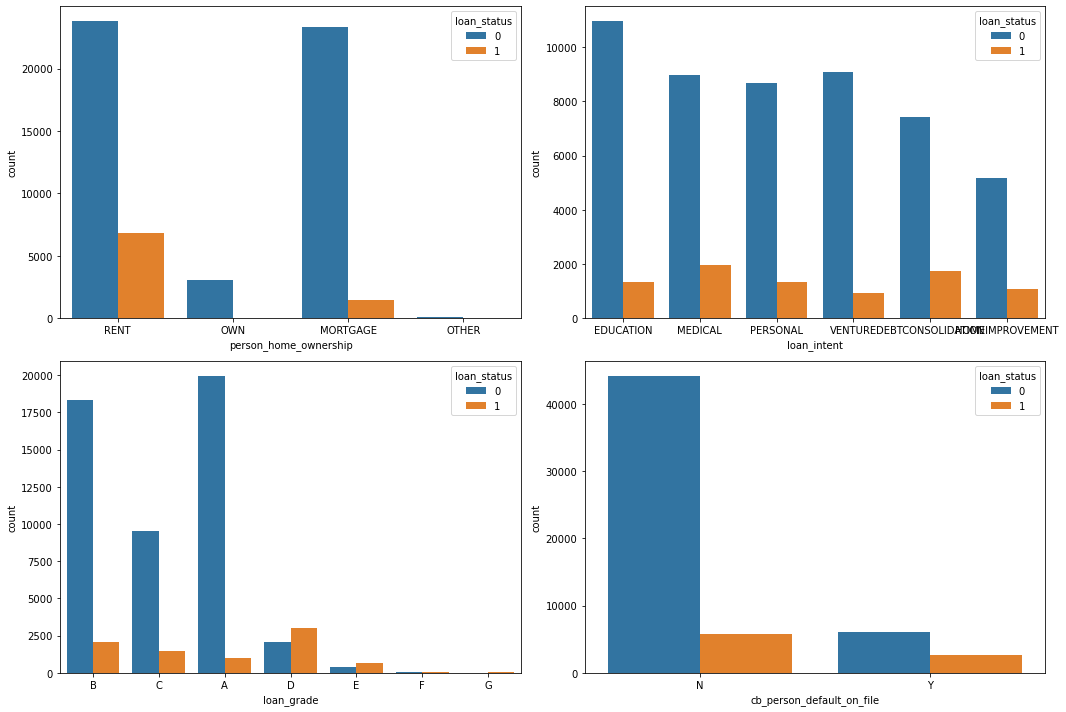

In [16]:
# cat cols
# create the figure and axes
a4_dims = (15, 10)
fig, axes = plt.subplots(2, 2, figsize=a4_dims)
axes = axes.ravel()  # flattening the array makes indexing easier

for col, ax in zip(cat_cols, axes):
    sns.countplot(data=df_train,x = col,hue = 'loan_status' , ax=ax)    

fig.tight_layout()
plt.show()

## Bivariate analysis

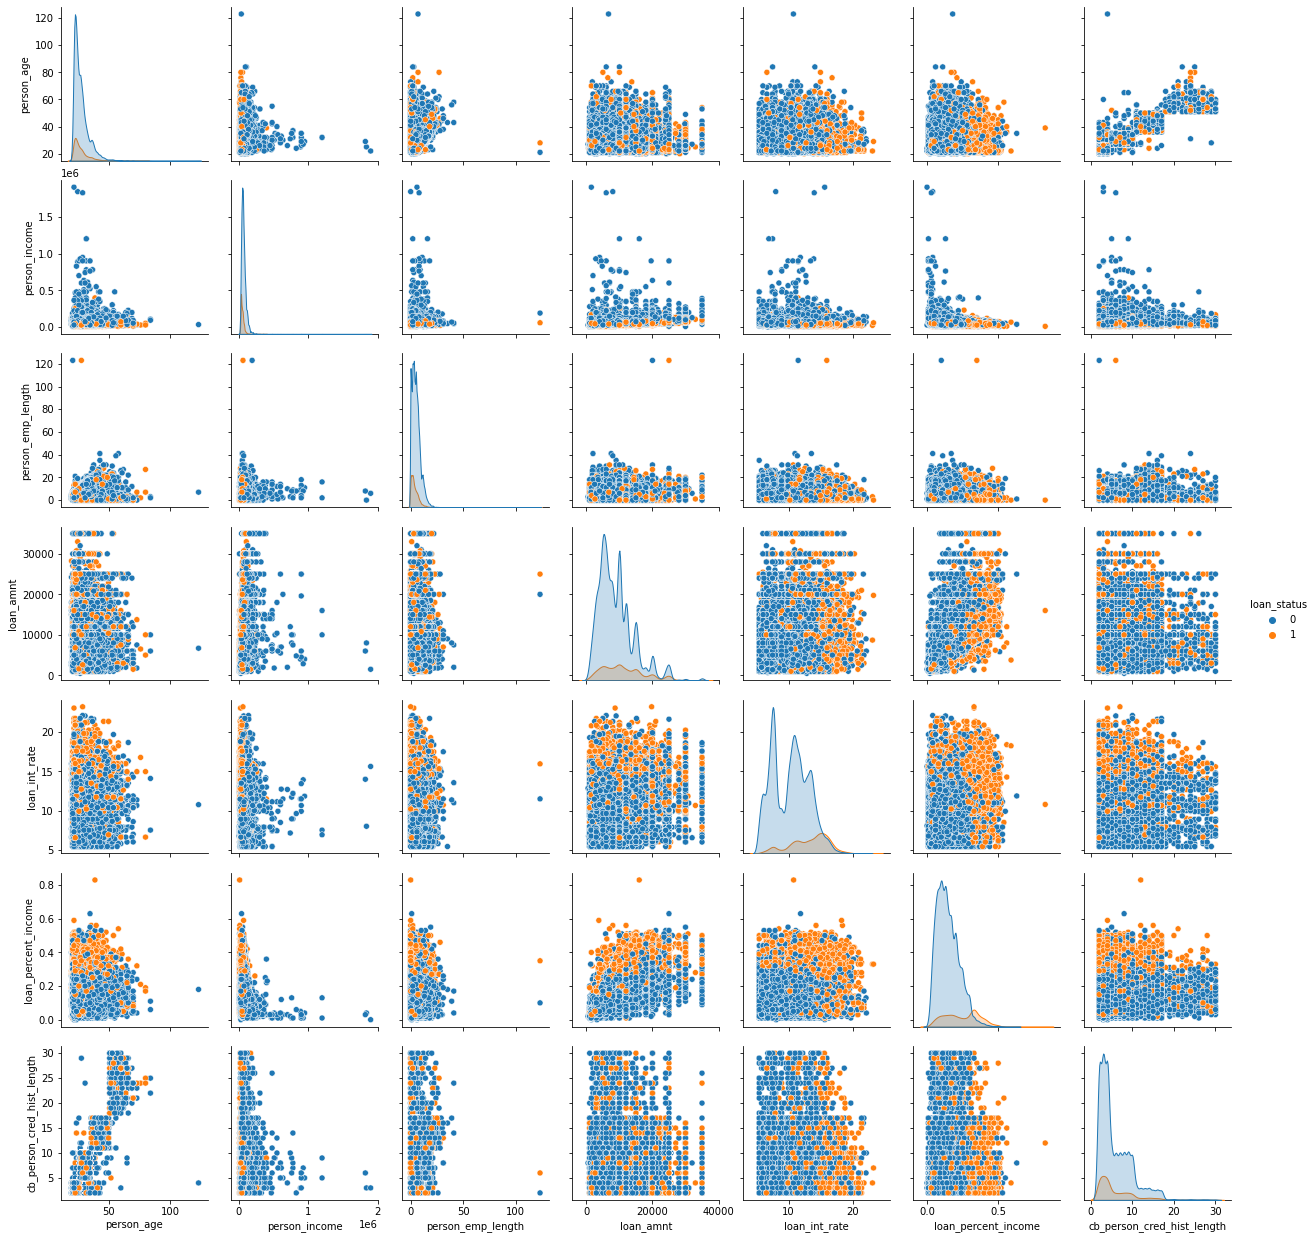

In [18]:
sns.pairplot(df_train, hue='loan_status')
plt.show()

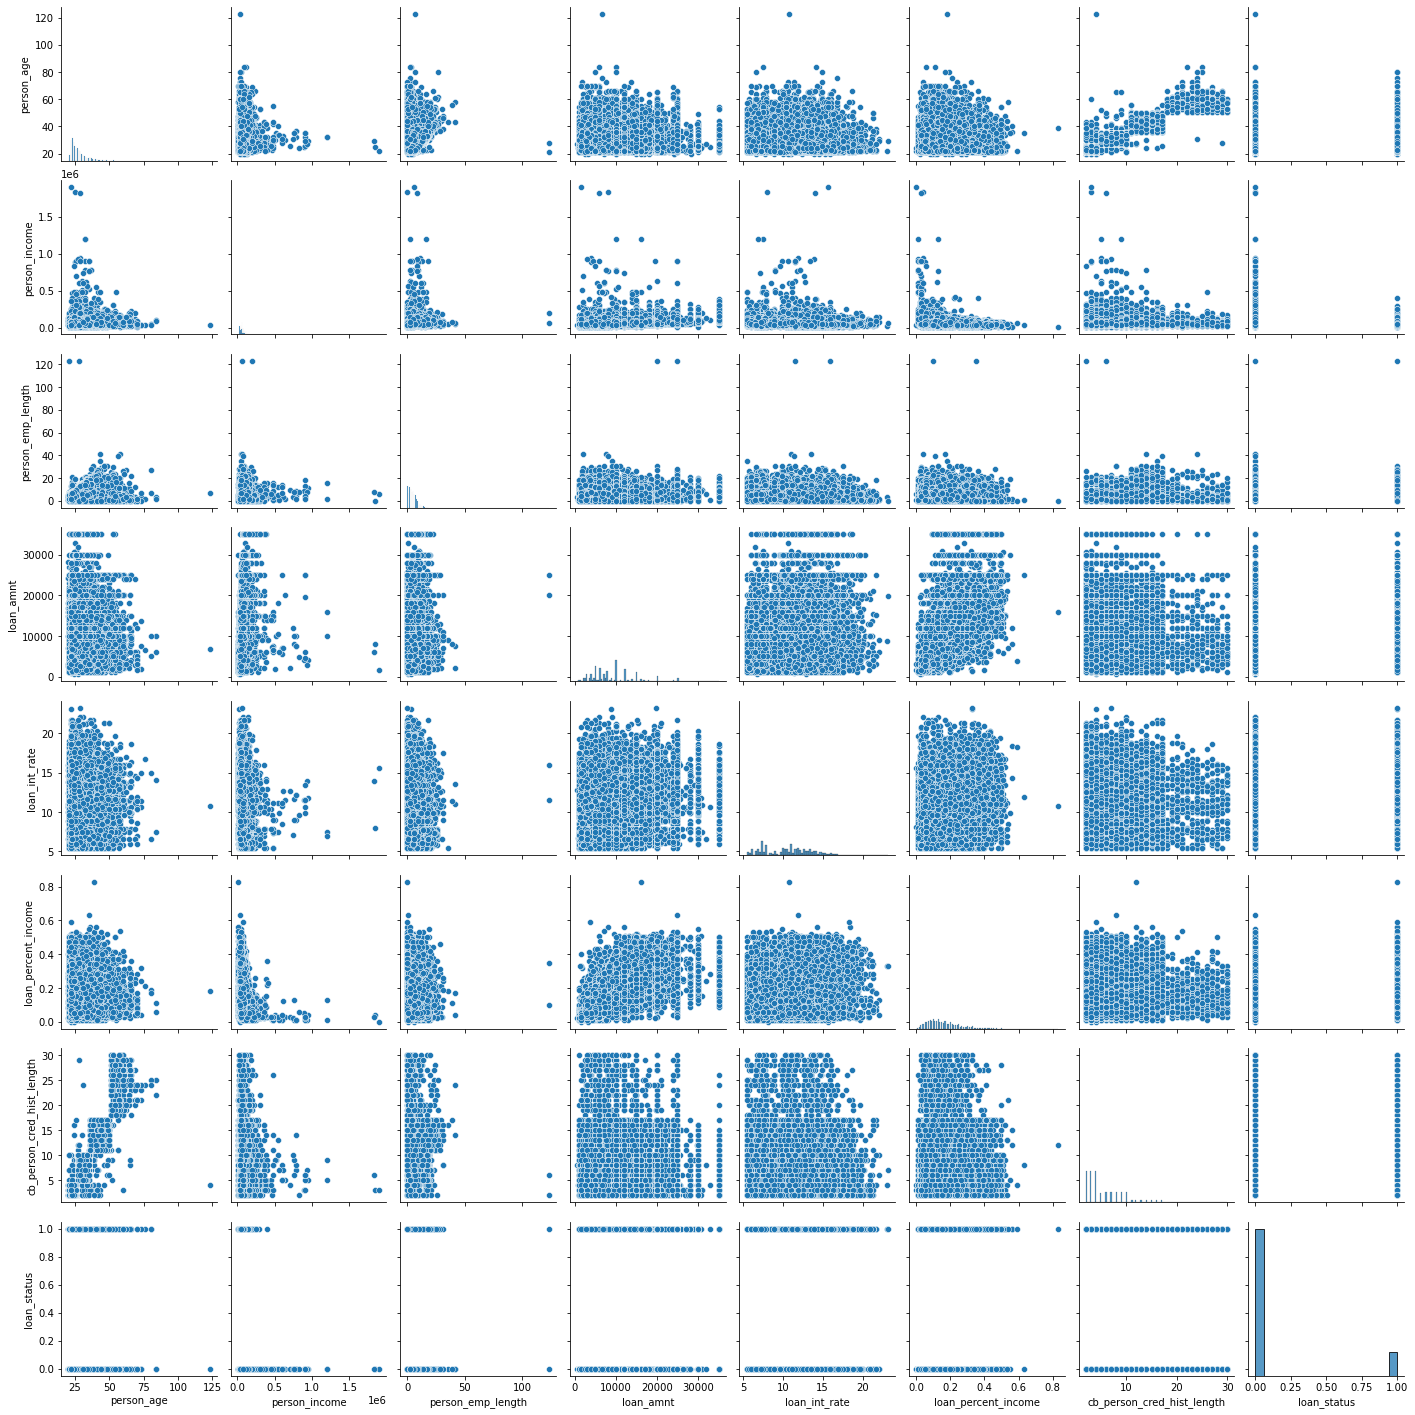

In [19]:
sns.pairplot(df_train)
plt.show()

## Performing Chi square test on cat cols 

In [23]:
for i in cat_cols:
    dataCrosstab = pd.crosstab(df_train[i],df_train['loan_status'])
    chi2, p, dof, expected = chi2_contingency(dataCrosstab)
    if(p < 0.05):
        print(f'{i} and loan status are dependent as p = {str(p)}')
    else:
        print(f'{i} and loan status are independent  as p ={str(p)}')

person_home_ownership and loan status are dependent as p = 0.0
loan_intent and loan status are dependent as p = 1.9499337690925461e-140
loan_grade and loan status are dependent as p = 0.0
cb_person_default_on_file and loan status are dependent as p = 0.0


## Performing Anova test on num cols

In [25]:
for i in num_cols:
  # Performing two-way ANOVA
    model = ols(i+' ~ loan_status', data = df_train).fit()
    result = sm.stats.anova_lm(model, typ=2)
    if(result['PR(>F)']['loan_status'] < 0.05):
        print(i+" and loan_status are dependent as p ="+ str(result['PR(>F)']['loan_status']))
    else:
        print(i+" and loan_status are independent as p ="+ str(result['PR(>F)']['loan_status']))

person_age and loan_status are independent as p =0.7844428454445612
person_income and loan_status are dependent as p =0.0
person_emp_length and loan_status are dependent as p =2.6819540145691146e-131
loan_amnt and loan_status are dependent as p =6.7948563028325126e-273
loan_int_rate and loan_status are dependent as p =0.0
loan_percent_income and loan_status are dependent as p =0.0
cb_person_cred_hist_length and loan_status are independent as p =0.4630853609521046


## Valid col for model building num cols: [ 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income'], cat_cols : ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']